In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import STL

## Stationary series

In [39]:
np.random.seed(42)
n = 100  
phi = 0.6  # Coeficiente do processo AR(1)
n = 100  # Número de pontos de dados

# Gerar ruído branco
white_noise = np.random.normal(0, 1, n)

# Create a DataFrame
dates = pd.date_range(start='2020-01-01', periods=n, freq='D')
df_stationary = pd.DataFrame(data=white_noise, index=dates, columns=['value'])
df_stationary

,value
2020-01-01,0.496714
2020-01-02,-0.138264
2020-01-03,0.647689
2020-01-04,1.523030
2020-01-05,-0.234153
...,...
2020-04-05,-1.463515
2020-04-06,0.296120
2020-04-07,0.261055
2020-04-08,0.005113


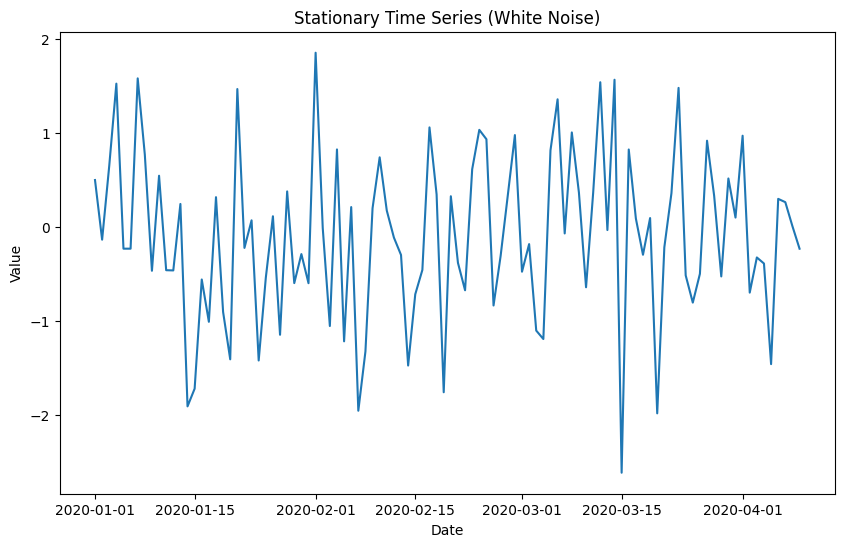

In [40]:
plt.figure(figsize=(10, 6))
plt.plot(df_stationary)
plt.title('Stationary Time Series (White Noise)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

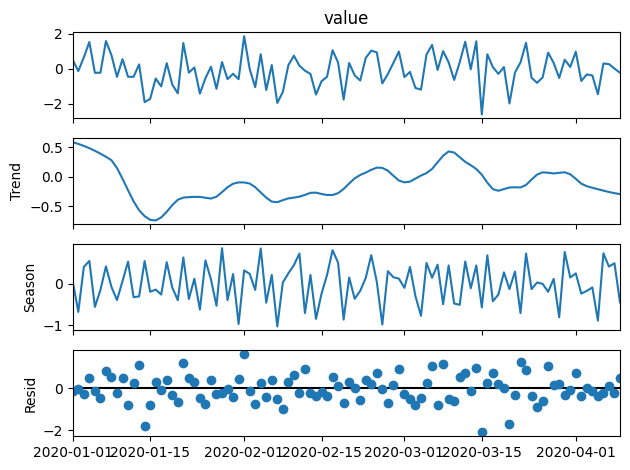

In [41]:
df_colum = df_stationary['value']
res = STL(df_colum).fit()
res.plot()
plt.show()

In [42]:
result = adfuller(df_stationary)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -10.084425913669714
p-value: 1.1655044784188669e-17


In [43]:
result = kpss(df_stationary)
print('KPSS Statistic:', result[0])
print('p-value:', result[1])

KPSS Statistic: 0.12349458192862009
p-value: 0.1


C:\Users\golf\AppData\Local\Temp\ipykernel_12944\2903664337.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(df_stationary)


Com os resultados acima podemos dizer que a serie é estacionaria <br>
O teste ADF rejeita a hipótese de não estacionariedade. <br>
O teste KPSS não rejeita a hipótese de estacionariedade.

## No stationary serie

In [44]:
n = 100
t = np.arange(n)
trend = 0.5 * t

white_noise = np.random.normal(0, 1, n)

series = trend + white_noise

dates = pd.date_range(start='2020-01-01', periods=n, freq='D')
df_non_stationary = pd.DataFrame(data=series, index=dates, columns=['value'])

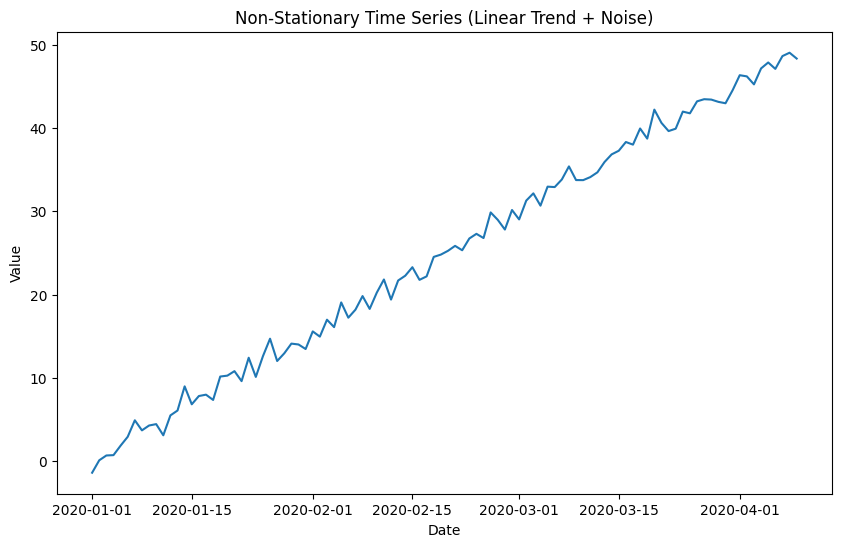

In [45]:
# Plotar a série temporal
plt.figure(figsize=(10, 6))
plt.plot(df_non_stationary)
plt.title('Non-Stationary Time Series (Linear Trend + Noise)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

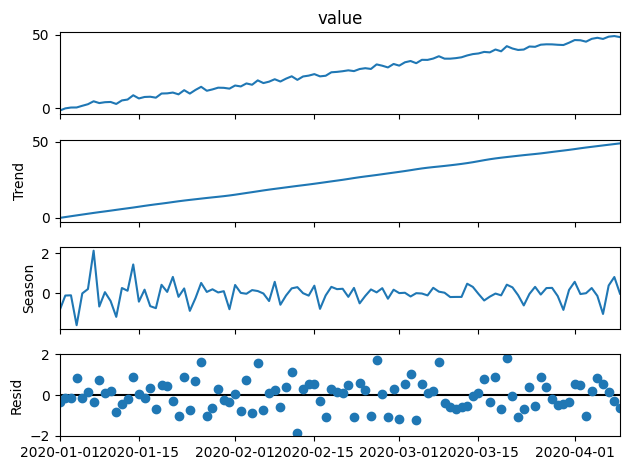

In [46]:
df_colum = df_non_stationary['value']
res = STL(df_colum).fit()
res.plot()
plt.show()

In [47]:
result = adfuller(df_non_stationary)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -0.2934898063205232
p-value: 0.9264213229586337


In [48]:
result = kpss(df_non_stationary)
print('KPSS Statistic:', result[0])
print('p-value:', result[1])

KPSS Statistic: 1.7726500639709326
p-value: 0.01


C:\Users\golf\AppData\Local\Temp\ipykernel_12944\1949694053.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(df_non_stationary)


Com os resultados acima podemos dizer que a serie não é estacionaria <br>
O teste ADF não rejeita a hipótese da serie não ser estacionaria. <br>
O teste KPSS rejeita a hipótese de estacionariedade.